In [1]:
# Import the required libraries.
# !pip install tensorflow
import os
import cv2

import numpy as np

import tensorflow as tf
import keras
import random
import matplotlib.pyplot as plt

# from moviepy.editor import *
%matplotlib inline
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# if tf.test.is_gpu_available():
#   print("GPU is available.")
# else:
#   print("GPU is not available.")

# # Get a list of all physical devices available to TensorFlow
# devices = tf.config.list_physical_devices()

# # Print the names of all GPUs
# for device in devices:
#   if device.device_type == "GPU":
#     print(device.name)

In [4]:
from keras.applications.vgg16 import VGG16

In [5]:
model= VGG16()

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
deepface_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=model.layers[-3].output)


In [8]:
model1 =Sequential()
model1.add(deepface_model)

In [9]:
model1.add(Dense(units=5, activation='softmax'))

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4096)              117479232 
                                                                 
 dense (Dense)               (None, 5)                 20485     
                                                                 
Total params: 117499717 (448.23 MB)
Trainable params: 117499717 (448.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


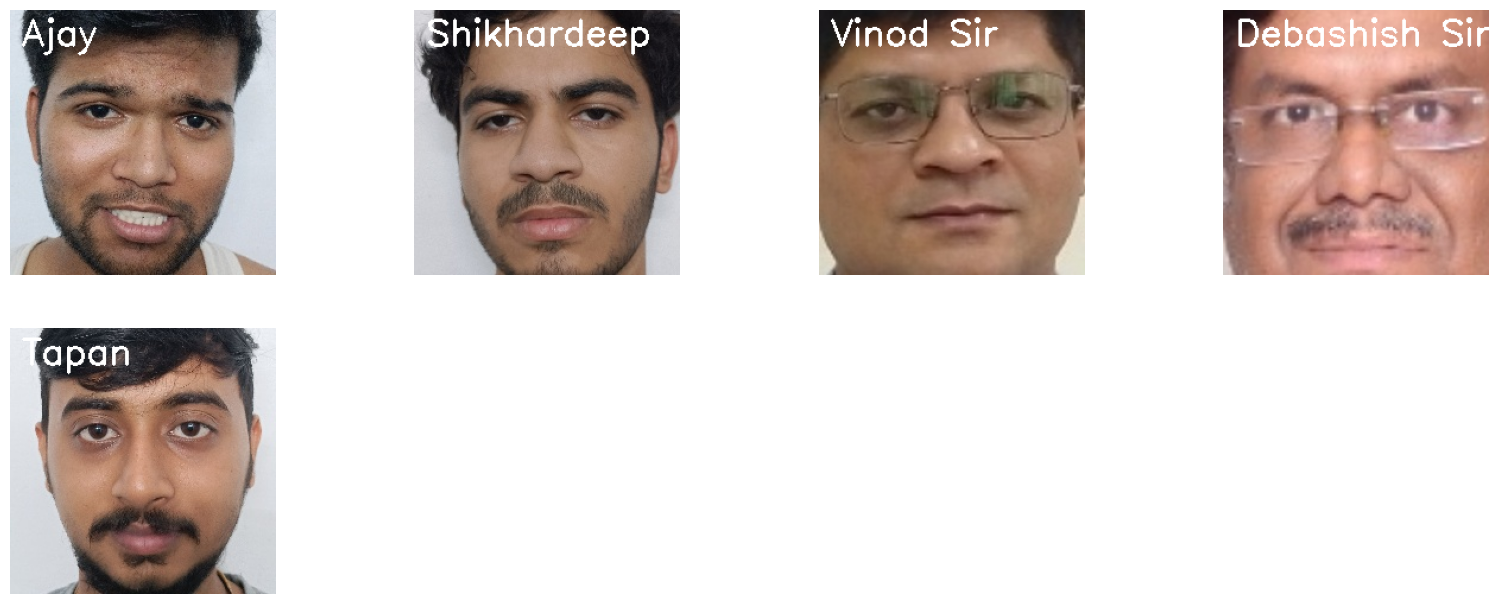

In [15]:
plt.figure(figsize=(20, 20))

all_classes_names = os.listdir(r"C:\Users\Lenovo\Desktop\lbp_1\dataset")
sample_size = min(20, len(all_classes_names))
random_range = random.sample(all_classes_names, sample_size)

for counter, selected_class_name in enumerate(random_range, 1):
    img_files_names_list = os.listdir(fr'C:\Users\Lenovo\Desktop\lbp_1\dataset/{selected_class_name}')
    selected_img_file_name = random.choice(img_files_names_list)
    img = cv2.imread(fr'C:\Users\Lenovo\Desktop\lbp_1\dataset/{selected_class_name}/{selected_img_file_name}')

    rgb_frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.putText(rgb_frame, selected_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2)
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

plt.show()


In [16]:
IMAGE_HEIGHT , IMAGE_WIDTH = 224,224
DATASET_DIR = r"C:\Users\Lenovo\Desktop\lbp_1\dataset"
# CLASSES_LIST = ["hot_Cropped","lose_Cropped","doctor_Cropped", "accident_Cropped","help_Cropped","call_Cropped","thief_Cropped","pain_Cropped"]
classes = []
folders = [f for f in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, f))]
for folder in folders:
    classes.append(folder)

In [17]:
classes

['Ajay', 'Debashish Sir', 'Shikhardeep', 'Tapan', 'Vinod Sir']

In [14]:
def create_dataset():
    feature = []
    labels = []
    img_files_path = []
    for class_index, class_name in enumerate(classes):
        print(f'Extracting Data of Class: {class_name}')
        files_list = os.listdir(os.path.join(DATASET_DIR,class_name))
        for file_name in files_list:
            img_file_path = os.path.join(DATASET_DIR,class_name,file_name)
#             frame = frame_extraction(video_file_path)
#             if(len(frame) == SEQUENCE_LENGTH):
#                 feature.append(frame)
#                 labels.append(class_index)
#                 video_files_path.append(video_file_path)
            img = cv2.imread(img_file_path)
            feature.append(img)
            labels.append(class_index)
            img_files_path.append(img_file_path)
    feature = np.asarray(feature)
    labels = np.array(labels)
    return feature,labels,img_file_path


In [15]:
features,labels,img_file_paths = create_dataset()

Extracting Data of Class: Ajay
Extracting Data of Class: Debashish Sir
Extracting Data of Class: Shikhardeep
Extracting Data of Class: Tapan
Extracting Data of Class: Vinod Sir


In [16]:
features = features.astype(float)/255

In [17]:
from keras.utils import to_categorical
one_hot_encoded_labels = to_categorical(labels)


In [18]:
import pandas as pd
pd.DataFrame(one_hot_encoded_labels)

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
227,0.0,0.0,0.0,0.0,1.0
228,0.0,0.0,0.0,0.0,1.0
229,0.0,0.0,0.0,0.0,1.0
230,0.0,0.0,0.0,0.0,1.0


In [19]:
features_train,features_test,labels_train,labels_test = train_test_split(features,one_hot_encoded_labels,test_size=0.20,shuffle=True)

In [20]:
from tensorflow.keras.optimizers import Adam
model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4096)              117479232 
                                                                 
 dense (Dense)               (None, 5)                 20485     
                                                                 
Total params: 117499717 (448.23 MB)
Trainable params: 117499717 (448.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# # Create an Instance of Early Stopping Callback
# # without attention
# import keras
# from keras import layers
# early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# # Compile the model and specify loss function, optimizer and metrics values to the model
# # opt = keras.optimizers.Adam(learning_rate=0.01)

# # callbacks = [early_stopping_callback]
# # convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ["accuracy"])

# # Start training the model. --> vary bacth size and epochs
# model_training_history = model1.fit(x = features_train, y = labels_train, epochs = 100, batch_size = 8,
#                                                      shuffle = True, validation_split = 0.2,
#                                    callbacks=[early_stopping_callback]
#                                   )

Epoch 1/100
19/19 [==============================] - 24s 595ms/step - loss: 177.0398 - accuracy: 0.1824 - val_loss: 1.6314 - val_accuracy: 0.2703
Epoch 2/100
19/19 [==============================] - 4s 193ms/step - loss: 1.6512 - accuracy: 0.2297 - val_loss: 1.5997 - val_accuracy: 0.2162
Epoch 3/100
19/19 [==============================] - 3s 169ms/step - loss: 1.6857 - accuracy: 0.2027 - val_loss: 1.7497 - val_accuracy: 0.2162
Epoch 4/100
19/19 [==============================] - 3s 174ms/step - loss: 1.7177 - accuracy: 0.1892 - val_loss: 5.8337 - val_accuracy: 0.1892
Epoch 5/100
19/19 [==============================] - 3s 167ms/step - loss: 2.5105 - accuracy: 0.1486 - val_loss: 1.6358 - val_accuracy: 0.1892
Epoch 6/100
19/19 [==============================] - 3s 174ms/step - loss: 2.0953 - accuracy: 0.2500 - val_loss: 1.6222 - val_accuracy: 0.3784
Epoch 7/100
19/19 [==============================] - 4s 205ms/step - loss: 1.5478 - accuracy: 0.3514 - val_loss: 1.5968 - val_accuracy: 0.1

In [25]:
# model_evaluation_history = model1.evaluate(features_test,labels_test)

2/2 [==============================] - 10s 4s/step - loss: 0.0125 - accuracy: 1.0000


In [30]:
# model_file_name = r'/content/drive/MyDrive/dataset/model1.h5'

# # Save your Model.
# model1.save(r'/content/drive/MyDrive/dataset/trained_model')

# model1.save(model_file_name)

In [11]:
mod = tf.keras.models.load_model(r"C:\Users\Lenovo\Desktop\lbp_1\model1.h5")


In [12]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 4096)              117479232 
                                                                 
 dense (Dense)               (None, 5)                 20485     
                                                                 
Total params: 117499717 (448.23 MB)
Trainable params: 117499717 (448.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
img_path = r"C:\Users\Lenovo\Desktop\lbp_1\dataset\Ajay\IMG20240507183855.jpg_1.jpg"
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))  # Resize to match model input size
img = img / 255.0  # Normalize pixel values to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Make predictions
predictions = mod.predict(img)

1/1 [==============================] - 1s 525ms/step


In [18]:
predicted_index = np.argmax(predictions)
print(classes[predicted_index])

Vinod Sir


In [19]:
def preprocess(file_path):

    # Read in image from file path
    img = cv2.imread(file_path)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Return image
    return img

In [20]:
def verify(model,img_path):
    # Add batch dimension
    img = preprocess(img_path)
    predictions = mod.predict(img)
    predicted_index = np.argmax(predictions)
#     print(classes[predicted_index])
    output = classes[predicted_index]
    return output

In [21]:
import cv2
from pathlib import Path

cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml" # Path to the Haar Cascade classifier XML file

# Load the cascade
face_cascade = cv2.CascadeClassifier(cascade_path)

cam = cv2.VideoCapture(0)

while True:
    ret, frame = cam.read()

    if not ret:
        print("No image error...")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 1)  # Draw rectangle around the face

        # Crop the face region
        face = frame[y:y + h, x:x + w]

        # Resize the face image to 224x224
        resized_face = cv2.resize(face, (224, 224))

        # Save the resized face image
        Path('Test_face/').mkdir(parents=True, exist_ok=True)
        cv2.imwrite('Test_face/newface.jpg', resized_face)
        R_ImagePath = 'Test_face/newface.jpg'

        # Here you can add your prediction function
        predicted_name = verify(mod, R_ImagePath)
        cv2.putText(frame, predicted_name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2,
                    cv2.LINE_AA)  # Write name of the predicted person above the rectangle

    cv2.imshow('video', frame)

    # Keypress handling
    key = cv2.waitKey(1)

    if key == 32:
        # Space pressed
        print("Analysing Person")
        person = predicted_name

    elif key == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break

cam.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 145ms/step
Escape hit, closing...


In [34]:
cap.release()
cv2.destroyAllWindows()